<a href="https://colab.research.google.com/github/IdkRandomTry/IdkRandomTry/blob/main/ATP_Data_Analysis_23110347.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pprint

In [ ]:
year_data = {}
for i in range (2000,2024):
  year_data[i] = pd.read_csv(f"/content/drive/MyDrive/Lab 10/tylerudite-atp-match-data/tylerudite-atp-match-data/data/{i}.csv")
players = pd.read_csv("/content/drive/MyDrive/Lab 10/tylerudite-atp-match-data/tylerudite-atp-match-data/data/atp_players.csv")

Q1) %age of matches won by worse ranked players over the years in grandslams.

31.69291338582677 2000
30.905511811023622 2001
32.28346456692913 2002
30.314960629921263 2003
32.28346456692913 2004
29.330708661417322 2005
29.330708661417322 2006
26.77165354330709 2007
28.74015748031496 2008
25.787401574803148 2009
26.968503937007878 2010
25.393700787401574 2011
25.787401574803148 2012
25.0 2013
26.574803149606304 2014
25.196850393700785 2015
25.393700787401574 2016
29.527559055118108 2017
28.74015748031496 2018
30.511811023622048 2019
30.971128608923888 2020
29.527559055118108 2021
27.755905511811026 2022
32.677165354330704 2023


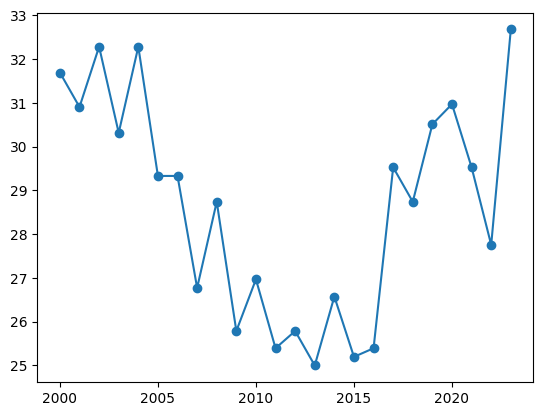

In [ ]:
ans = []
for year in year_data:
  df = year_data[year]
  df[['wrank']] = df[['wrank']].apply(pd.to_numeric, errors='coerce')
  df[['lrank']] = df[['lrank']].apply(pd.to_numeric, errors='coerce')
  gs = df[df['series']=='Grand Slam']
  total_matches = gs.shape[0]
  lower_rank_win = gs[gs['wrank']>gs['lrank']]
  percent_win = lower_rank_win.shape[0]/total_matches*100
  ans.append(percent_win)
  print(percent_win, year)

plt.plot(year_data.keys(), ans, marker = 'o')
plt.show()


 Q2) Find the average %age of games won by a Grand Slam winner in the tournament. Check separately for each grandslam.

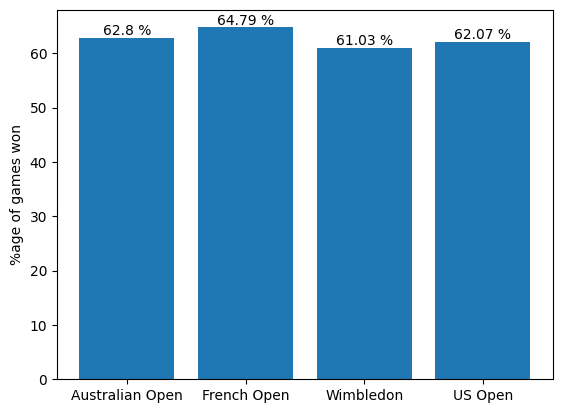

In [ ]:
ans = {}
for year in year_data:
  df = year_data[year]
  df = df.replace(' ', np.nan)
  df[['w1', 'w2', 'w3', 'w4', 'w5']] = df[['w1', 'w2', 'w3', 'w4', 'w5']].fillna(0).astype(int)
  df[['l1', 'l2', 'l3', 'l4', 'l5']] = df[['l1', 'l2', 'l3', 'l4', 'l5']].fillna(0).astype(int)
  gs = df[df['series']=='Grand Slam']
  big4 = gs.tournament.unique()
  for slam in big4:
    slam_df = df[df['tournament'] == slam]
    winner = slam_df[slam_df['round'] == 'The Final']['winner'].values[0]
    w_stat = slam_df[slam_df['winner'] == winner]
    w_games = w_stat[['w1', 'w2', 'w3', 'w4', 'w5']].values.sum()
    l_games = w_stat[['l1', 'l2', 'l3', 'l4', 'l5']].values.sum()

    if slam in ans:
      ans[slam].append([year, winner, w_games, l_games])
    else:
      ans[slam] = [[year, winner, w_games, l_games]]

x = []
for slam in ans:
  r = []
  for year in ans[slam]:
    r.append(year[2]/(year[2]+year[3]))
  r_avg = np.mean(r)
  x.append(r_avg*100)

bars = plt.bar(ans.keys(), x)
plt.ylabel('%age of games won')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 2)} %', ha='center', va='bottom')
plt.show()

Q3) Number of tournaments won by BIG 3: Federer, Djokovic, Nadal across the years. Use the weightage according to series to callculate a score for the players across the years. Plot this to find peak time for each player

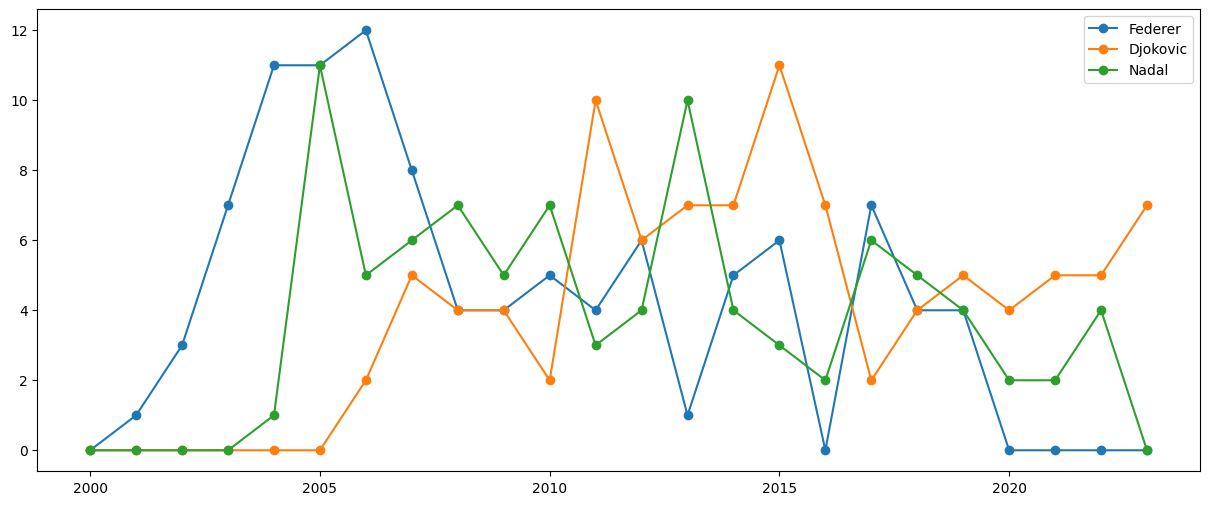

In [ ]:
def wins(plyr):
  wins = []
  for year in year_data:
    df = year_data[year]
    plyr_won = df[df['winner']==plyr]
    plyr_won = plyr_won[plyr_won['round']=='The Final']
    score = 0
    wins.append(plyr_won.shape[0])
  return wins

plt.figure(figsize=(15, 6))
plt.plot(year_data.keys(), wins('Federer R.'), marker = 'o', label = 'Federer')
plt.plot(year_data.keys(), wins('Djokovic N.'), marker = 'o', label = 'Djokovic')
plt.plot(year_data.keys(), wins('Nadal R.'), marker = 'o', label = 'Nadal')
plt.legend()
plt.show()

Q4) take data from 2009. Find corelation between average rank of winner and series points.

In [ ]:
rank250 = []
rank500 = []
rank1000 = []
rank2000 = []
for year in year_data:
  if year < 2009:
    continue
  df = year_data[year]

  series = [df[df['series']=='ATP250'],df[df['series']=='ATP500'], df[df['series']=='Masters 1000'], df[df['series']=='Grand Slam']]
  avg_wrank = []
  for s in series:
    r_avg = s[s['round']=='The Final']['wrank'].mean()
    avg_wrank.append(round(r_avg,2))

atp_points = [250, 500, 1000, 2000]
print(atp_points)
print(avg_wrank)
print(np.corrcoef(atp_points, avg_wrank)[0, 1])

[250, 500, 1000, 2000]
[42.9, 15.33, 5.11, 2.75]
-0.7709631538034502


This means that higher value tournaments are won by less ranked (better ranked) players

Q5) Plot data of months when ATP players were born.

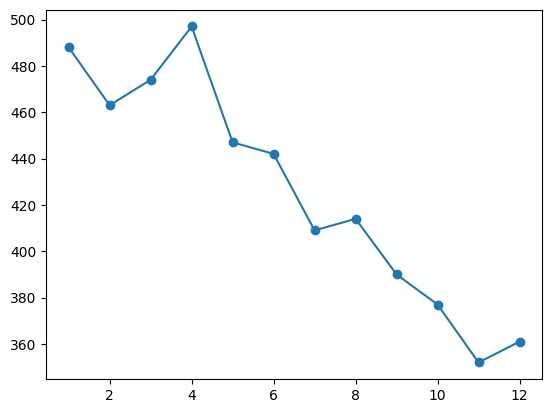

-0.950683604304333


In [ ]:
plyr_month = []
for i in range(1,13):
  plyr_month.append(players[players['birth_month']==i].shape[0])

plt.plot(range(1,13), plyr_month, marker = 'o')
plt.show()

print(np.corrcoef(range(1,13), plyr_month)[0, 1])

This means that the number of ATP players from early months of the year is higher than those born in later months of the year.

Reference: https://youtu.be/3LopI4YeC4I?si=xk3ct9avELRkJxqI&t=73

Q6) Find percentage of matches won by big 3 across different surfaces

In [ ]:
import pprint

surface = ['Hard', 'Grass', 'Clay']
big3 = ['Federer R.', 'Nadal R.', 'Djokovic N.']
wins_dict = {}
for s in surface:
  temp = {}
  for p in big3:
    temp[p] = [0,0]
  wins_dict[s] = temp
for year in year_data:
  df = year_data[year]
  for s in surface:
    df_ = df[df['surface'] == s]
    for p in big3:
      wins = df_[df_['winner']==p].shape[0]
      total = wins + df_[df_['loser']==p].shape[0]
      wins_dict[s][p][0] += wins
      wins_dict[s][p][1] += total

for s in surface:
  for p in big3:
    wins_dict[s][p] = f'{round(wins_dict[s][p][0]/wins_dict[s][p][1]*100,2)} %'

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(wins_dict)



{   'Clay': {   'Djokovic N.': '81.04 %',
                'Federer R.': '76.79 %',
                'Nadal R.': '90.87 %'},
    'Grass': {   'Djokovic N.': '86.72 %',
                 'Federer R.': '87.79 %',
                 'Nadal R.': '78.35 %'},
    'Hard': {   'Djokovic N.': '85.41 %',
                'Federer R.': '83.86 %',
                'Nadal R.': '77.41 %'}}


Q7) Find average and standard deviation of BMI of ATP player.

In [ ]:
bmi = []
df = players[players['weight_kg'] != 0]
df = df[df['height_cm'] > 5]
df['bmi'] = df['weight_kg']/((players['height_cm']/100)**2)
df['bmi'] = df['weight_kg']/((players['height_cm']/100)**2)
print(df['bmi'].mean())
print(np.std(df['bmi']))

23.078978141013593
3.9383530071075237


Q8) %age of grandslam matces which are 5 set, 4 set, 3 set over the years.

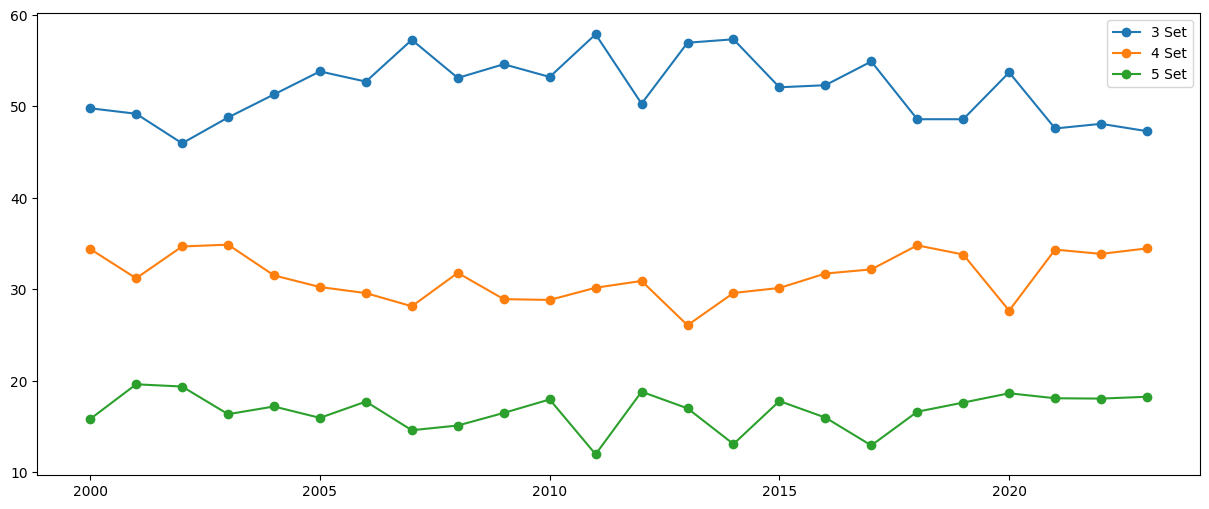

In [ ]:
set3_arr = []
set4_arr = []
set5_arr = []


for year in year_data:
  df = year_data[year]
  gs = df[df['series']=='Grand Slam']
  total_matches = gs.shape[0] - gs['w3'].isna().sum()
  set5 = (total_matches - gs['w5'].isna().sum())
  set4 = (total_matches - gs['w4'].isna().sum() -set5)
  set3 = (total_matches - set4 -set5)
  set5_perc = set5/total_matches*100
  set4_perc = set4/total_matches*100
  set3_perc = set3/total_matches*100
  set3_arr.append(set3_perc)
  set4_arr.append(set4_perc)
  set5_arr.append(set5_perc)

plt.figure(figsize=(15, 6))
plt.plot(year_data.keys(), set3_arr, marker = 'o', label = '3 Set')
plt.plot(year_data.keys(), set4_arr, marker = 'o', label = '4 Set')
plt.plot(year_data.keys(), set5_arr, marker = 'o', label = '5 Set')
plt.legend()
plt.show()

Q9) Number of tournaments per series in 2023

[38, 4, 12, 9, 1]


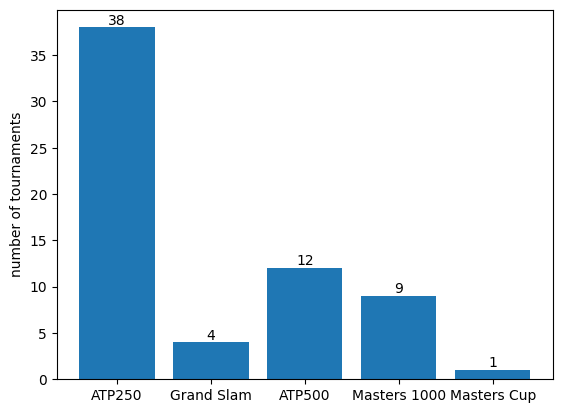

In [ ]:
df = year_data[2023]
series = df['series'].unique()
t = []
for s in series:
  t.append(df[df['series']==s]['tournament'].nunique())

x = series.tolist()
print(t)
bars = plt.bar(x, t)
plt.ylabel('number of tournaments')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 2)}', ha='center', va='bottom')
plt.show()

Q10) Average number of tournaments.

In [ ]:
arr = []
for year in year_data:
  df = year_data[year]
  arr.append(df['tournament'].nunique())

print(np.mean(arr))

64.33333333333333
